In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import xbpch
import cartopy.crs as ccrs
from matplotlib import colorbar, colors
import statistics
from sklearn.metrics import r2_score
%matplotlib inline
# Name the xbpch files for the reference and new models
OLD = '/home/brittany/Documents/HG/pythonHgBenchmark/trac_avg.geosfp_2x25_Hg.v12-01.bpch'
NEW = '/home/brittany/Documents/HG/pythonHgBenchmark/trac_avg.geosfp_2x25_Hg.v12-01.new.bpch'



# Upload/open the data from the models 
OLD_ds = (xbpch.open_bpchdataset(OLD))
NEW_ds = (xbpch.open_bpchdataset(NEW))


/home/brittany/anaconda3/envs/geoschem/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brittany/anaconda3/envs/geoschem/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brittany/anaconda3/envs/geoschem/lib/python3.6/site-packages/pandas/io/parsers.py:710: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [2]:
# Define a function to take the mean of any variable at the surface.
def GeneralHgMeanSurface (Variable, Units, Unit_Conversion, Title="Mean over Time"):
    
    # An if statement is used to account for the use of multiple variables.
    if type(Variable) is list and len(Variable) > 1:
        OLD_sum=0
        NEW_sum=0
        
        # Create a for loop to add each variable, extracting the mean of the variable in respect to time 
        # at surface level.
        for i in range(len(Variable)):
            tmpVar1 = ((OLD_ds[Variable[i]].isel(lev=0).mean('time')) * Unit_Conversion)
            OLD_sum = OLD_sum + tmpVar1
            tmpVar2 = ((NEW_ds[Variable[i]].isel(lev=0).mean('time')) * Unit_Conversion)
            NEW_sum = NEW_sum + tmpVar2
    else:
        # Extract the mean of one variable in respect to time at surface level 
        NEW_sum = ((NEW_ds[Variable].isel(lev=0).mean('time')) * Unit_Conversion)
        OLD_sum = ((OLD_ds[Variable].isel(lev=0).mean('time')) * Unit_Conversion)
    
    
    
    # Find the absolute difference between the reference and new model.
    Abs_diff = NEW_sum - OLD_sum
    # Find the absolute maximum value of the absolute difference. 
    Abs_MaxVal= np.max(np.abs(Abs_diff))
    
    
    # Find the percent difference of the models.  
    Perc_diff = (Abs_diff / OLD_sum)*100
    # Find the absolute maximum value of the percent  difference. 
    Perc_MaxVal= np.max(np.abs(Perc_diff))
    
    
    
    # Plot the four graphs as subplots.
    plt.figure(figsize=(20,10))
    
    # Plot the reference model and use a geographical map.
    ax = plt.subplot(221, projection=ccrs.PlateCarree())
    im=OLD_sum.plot.contourf(x='lon',y='lat',ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', title= (Title), 
                         cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label': Units})  
    # Add a title.
    plt.title(' Reference Model Version: '+Title) 
    # Show the coastlines.
    ax.coastlines()
    
    
    
    # Plot the new model using a geographical map.    
    graph = plt.subplot(222, projection=ccrs.PlateCarree())
    im= NEW_sum.plot.contourf(x='lon',y='lat', cmap='viridis', transform=ccrs.PlateCarree(), ax=ax,
                             cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label': Units})
    # Add a title.
    plt.title('New Model Version: '+ Title)
    # Show the coastlines.
    ax.coastlines()
    
    # Plot the absolute difference using a geographical map
    ax = plt.subplot(223, projection=ccrs.PlateCarree())
    im= Abs_diff.plot.imshow(x='lon',y='lat', ax=ax,transform=ccrs.PlateCarree(), cmap='RdBu', vmin=(-Abs_MaxVal), vmax=(Abs_MaxVal),
                          cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label': Units})
    # Add a title
    plt.title("Absolute Difference")
    # Show the coastlines
    ax.coastlines()
     
    # Plot the percent difference 
    ax = plt.subplot(224, projection=ccrs.PlateCarree())
    im= Perc_diff.plot.imshow(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap='RdBu', vmin=(-Perc_MaxVal), vmax=(Perc_MaxVal),
                        cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label':"%" })
    # Add a title
    plt.title("Percent Difference (%)")
    # Show the coastlines 
    ax.coastlines()
    
    # Show the 4 subplots 
    GenGraph= plt.show()
    
    # Return the 4 graphs
    return GenGraph
    


In [21]:
# Define a function to take the mean of any variable at the surface.
def GeneralHgMeanSurface (Dataset_OLD, Dataset_NEW, Variable, Units, Unit_Conversion, Title="Mean over Time"):
    
    # An if statement is used to account for the use of multiple variables.
    if type(Variable) is list and len(Variable) > 1:
        OLD_sum=0
        NEW_sum=0
        
        # Create a for loop to add each variable, extracting the mean of the variable in respect to time 
        # at surface level.
        for i in range(len(Variable)):
            tmpVar1 = ((Dataset_OLD[Variable[i]].isel(lev=0).mean('time')) * Unit_Conversion)
            OLD_sum = OLD_sum + tmpVar1
            tmpVar2 = ((Dataset_NEW[Variable[i]].isel(lev=0).mean('time')) * Unit_Conversion)
            NEW_sum = NEW_sum + tmpVar2
    else:
        # Extract the mean of one variable in respect to time at surface level 
        NEW_sum = ((Dataset_NEW[Variable].isel(lev=0).mean('time')) * Unit_Conversion)
        OLD_sum = ((Dataset_OLD[Variable].isel(lev=0).mean('time')) * Unit_Conversion)
    
    
    
    # Find the absolute difference between the reference and new model.
    Abs_diff = NEW_sum - OLD_sum
    # Find the absolute maximum value of the absolute difference. 
    Abs_MaxVal= np.max(np.abs(Abs_diff))
    
    
    # Find the percent difference of the models.  
    Perc_diff = (Abs_diff / OLD_sum)*100
    # Find the absolute maximum value of the percent  difference. 
    Perc_MaxVal= np.max(np.abs(Perc_diff))
    
    
    
    # Plot the four graphs as subplots.
    plt.figure(figsize=(20,10))
    
    # Plot the reference model and use a geographical map.
    ax = plt.subplot(221, projection=ccrs.PlateCarree())
    im=OLD_sum.plot.contourf(x='lon',y='lat', transform=ccrs.PlateCarree(), cmap='viridis',title= (Title), 
                         cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label': Units})  
    # Add a title.
    plt.title(' Reference Model Version: '+Title) 
    # Show the coastlines.
    ax.coastlines()
    
    
    # Plot the new model using a geographical map.    
    ax=plt.subplot(222, projection=ccrs.PlateCarree())
    im= NEW_sum.plot.contourf(x='lon',y='lat', cmap='viridis', transform=ccrs.PlateCarree(), ax=ax, 
                             cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label': Units})
    # Add a title.
    plt.title('New Model Version: '+ Title)
    # Show the coastlines.
    ax.coastlines()
    
    # Plot the absolute difference using a geographical map
    ax = plt.subplot(223, projection=ccrs.PlateCarree())
    im= Abs_diff.plot.imshow(x='lon',y='lat', ax=ax,transform=ccrs.PlateCarree(), cmap='RdBu', vmin=(-Abs_MaxVal), vmax=(Abs_MaxVal),
                          cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label': Units})
    # Add a title
    plt.title("Absolute Difference")
    # Show the coastlines
    ax.coastlines()
     
    # Plot the percent difference 
    ax = plt.subplot(224, projection=ccrs.PlateCarree())
    im= Perc_diff.plot.imshow(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap='RdBu', vmin=(-Perc_MaxVal), vmax=(Perc_MaxVal),
                        cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label':"%" })
    # Add a title
    plt.title("Percent Difference (%)")
    # Show the coastlines 
    ax.coastlines()
    
    # Show the 4 subplots 
    GenGraph= plt.show()
    
    # Return the 4 graphs

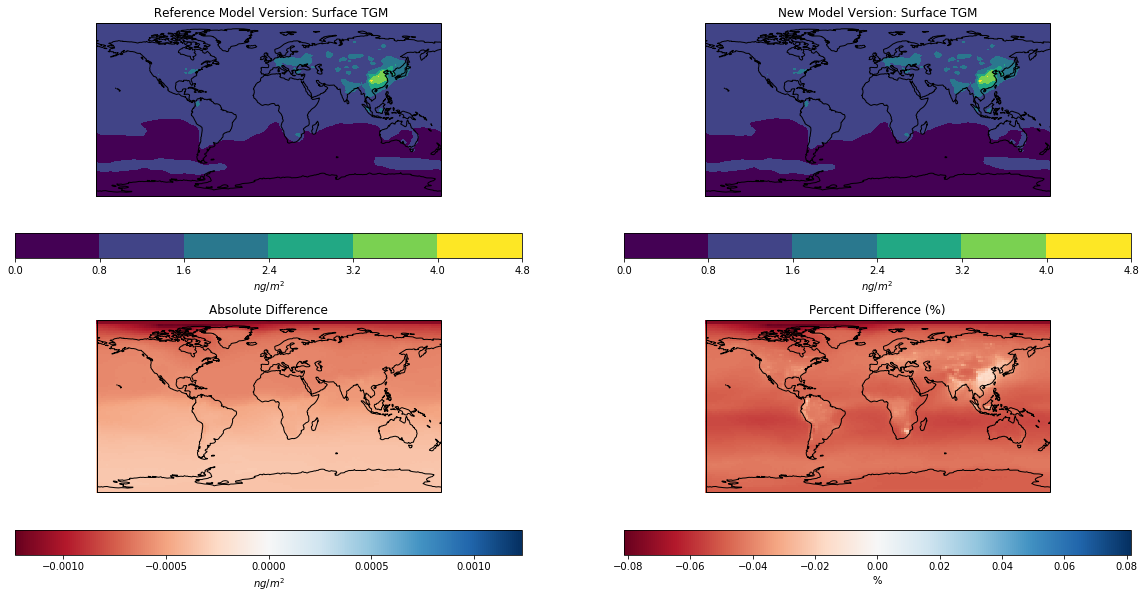

In [22]:
GeneralHgMeanSurface(Dataset_OLD=OLD_ds,Dataset_NEW= NEW_ds,  Variable=['IJ_AVG_S_Hg0', 'IJ_AVG_S_Hg2'], 
                      Units="$ng/m^2$", Unit_Conversion=8.93, Title="Surface TGM")